In [77]:
from bs4 import BeautifulSoup as Parser
from datetime import datetime
import matplotlib.pyplot as plt

In [78]:
ride = "NCAR"
soup = None
with open(f'Rides/{ride}.gpx') as f:
    soup = Parser(f.read())

In [111]:
def parseNum(num_tag):
    if num_tag:
        return float(num_tag.text)
    return None

def parseInt(int_tag):
    if int_tag:
        return int(int_tag.text)
    return None

def parseDatapoint(datapoint):
    return {
        'lat': float(datapoint['lat']),
        'lon': float(datapoint['lon']),
        'elevation': parseNum(datapoint.ele),
        'time': datetime.strptime(datapoint.time.text, '%Y-%m-%dT%H:%M:%SZ'),
        'heartrate': parseInt(datapoint.find('gpxtpx:hr')),
        'cadence': parseInt(datapoint.find('gpxtpx:cad')),
        'power': parseInt(datapoint.find('power')),
        'temperature': parseInt(datapoint.find('gpxtpx:atemp')),
    }

def getAxis(ls, key):
    return [x[key] for x in ls]

def plotAttr(datapoints, attr, x_axis='time'):
    x = getAxis(datapoints, x_axis)
    y = getAxis(datapoints, attr)
    plt.plot(x,y)
    plt.title(attr.capitalize())

In [142]:
trackpoints = soup.find_all('trkpt')
print(trackpoints[0])
datapoints = []
for point in trackpoints:
    datapoints.append(parseDatapoint(point))

<trkpt lat="40.0062070" lon="-105.2583160">
<ele>1586.4</ele>
<time>2020-08-07T17:20:26Z</time>
<extensions>
<gpxtpx:trackpointextension>
<gpxtpx:hr>149</gpxtpx:hr>
<gpxtpx:cad>81</gpxtpx:cad>
</gpxtpx:trackpointextension>
</extensions>
</trkpt>


In [143]:
datapoints[0:5]

[{'lat': 40.006207,
  'lon': -105.258316,
  'elevation': 1586.4,
  'time': datetime.datetime(2020, 8, 7, 17, 20, 26),
  'heartrate': 149,
  'cadence': 81,
  'power': None,
  'temperature': None},
 {'lat': 40.00618,
  'lon': -105.258316,
  'elevation': 1586.4,
  'time': datetime.datetime(2020, 8, 7, 17, 20, 27),
  'heartrate': 149,
  'cadence': 81,
  'power': 171,
  'temperature': None},
 {'lat': 40.006149,
  'lon': -105.258308,
  'elevation': 1586.2,
  'time': datetime.datetime(2020, 8, 7, 17, 20, 28),
  'heartrate': 150,
  'cadence': 82,
  'power': 171,
  'temperature': None},
 {'lat': 40.006115,
  'lon': -105.258308,
  'elevation': 1586.4,
  'time': datetime.datetime(2020, 8, 7, 17, 20, 29),
  'heartrate': 151,
  'cadence': 82,
  'power': 166,
  'temperature': None},
 {'lat': 40.006084,
  'lon': -105.258308,
  'elevation': 1586.6,
  'time': datetime.datetime(2020, 8, 7, 17, 20, 30),
  'heartrate': 151,
  'cadence': 83,
  'power': 167,
  'temperature': 24}]

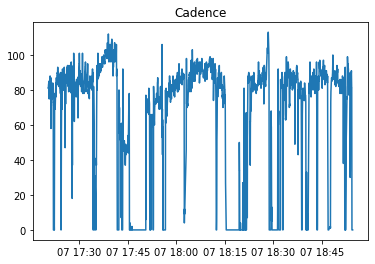

In [112]:
plotAttr(datapoints, 'cadence')

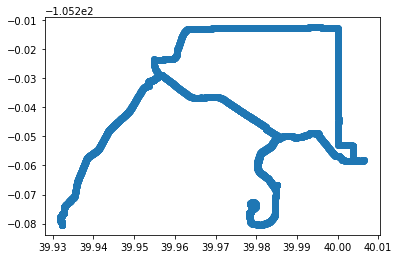

In [100]:
x = getAxis(datapoints, 'lat')
y = getAxis(datapoints, 'lon')
plt.scatter(x,y)

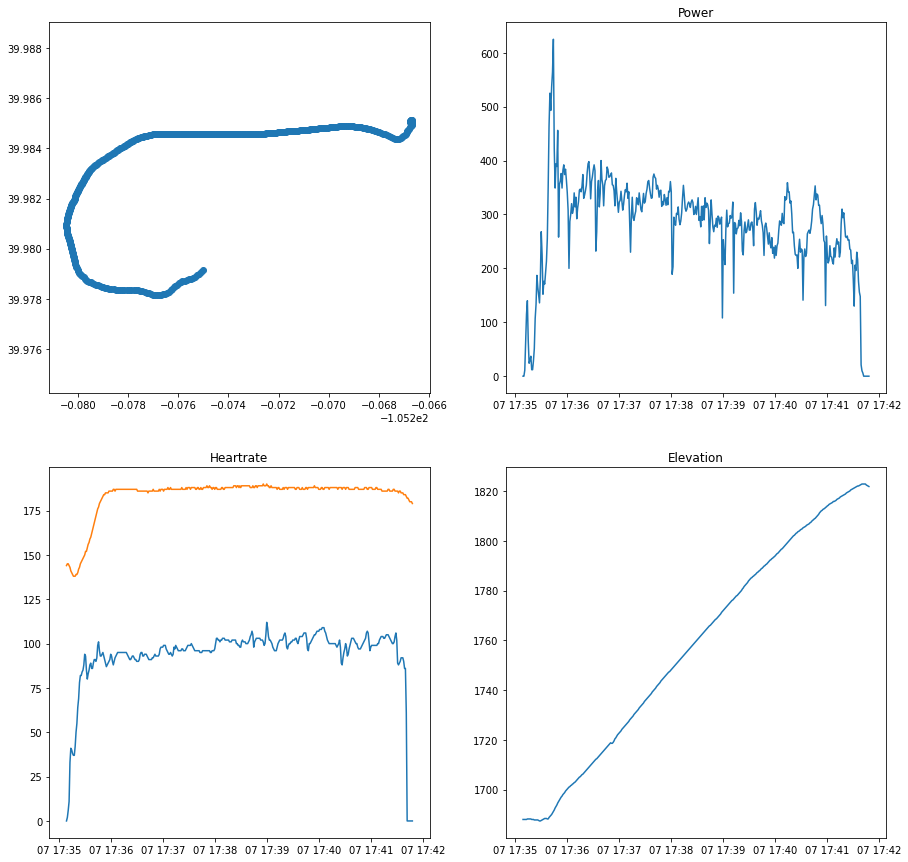

In [148]:
segment = datapoints[880:1280]
fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
x = getAxis(segment, 'lon')
y = getAxis(segment, 'lat')
plt.scatter(x,y)
plt.axis('equal')

plt.subplot(2,2,2)
plotAttr(segment, 'power')

plt.subplot(2,2,3)
plotAttr(segment, 'cadence')
plotAttr(segment, 'heartrate')


plt.subplot(2,2,4)
plotAttr(segment, 'elevation')